In [43]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp
import treecorr

def display_param(param_string):
    """
    Displaying our values every time. (slightly shady)
    """
    param_value = eval(param_string)
    print(f"{param_string} = {param_value}")
    return

# same size as in latex
font_factor = 10.88 / 12
main_font_size = 12 * font_factor
axes_font_size = 10 * font_factor

from matplotlib_stylesheet import group05_style_sheet, style_rest, set_size
plt.rcParams.update(group05_style_sheet)


# P2.1 : Working and plotting data on the celestial sphere with healpy

In this exercise you will generate all-sky maps for different NSIDE parameters. 

#### For NSIDE = $2^0$ make an array of size npix with np.arange

 - Use the equation provided in the lab manual to first compute the number of pixels (npix) for the given NSIDE. 
 - Compare your result the output of hp.nside2npix command 
 
 The first few functions are already written to help you get started!

In [2]:
NSIDE = 1
npix_healpy = hp.nside2npix(nside=NSIDE)
print(npix_healpy)

12


In [3]:
npix = 12 * NSIDE**2 # write the relevant equation from the manual and compare the value of npix with npix_healpy above
print(npix)

12


 - Use np.arange to create an array of size npix and print it

In [4]:
map_arr = np.arange(npix)
print(map_arr)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


#### Visualize the array in healpy map format using the function hp.mollview (https://healpy.readthedocs.io/en/latest/generated/healpy.visufunc.mollview.html).

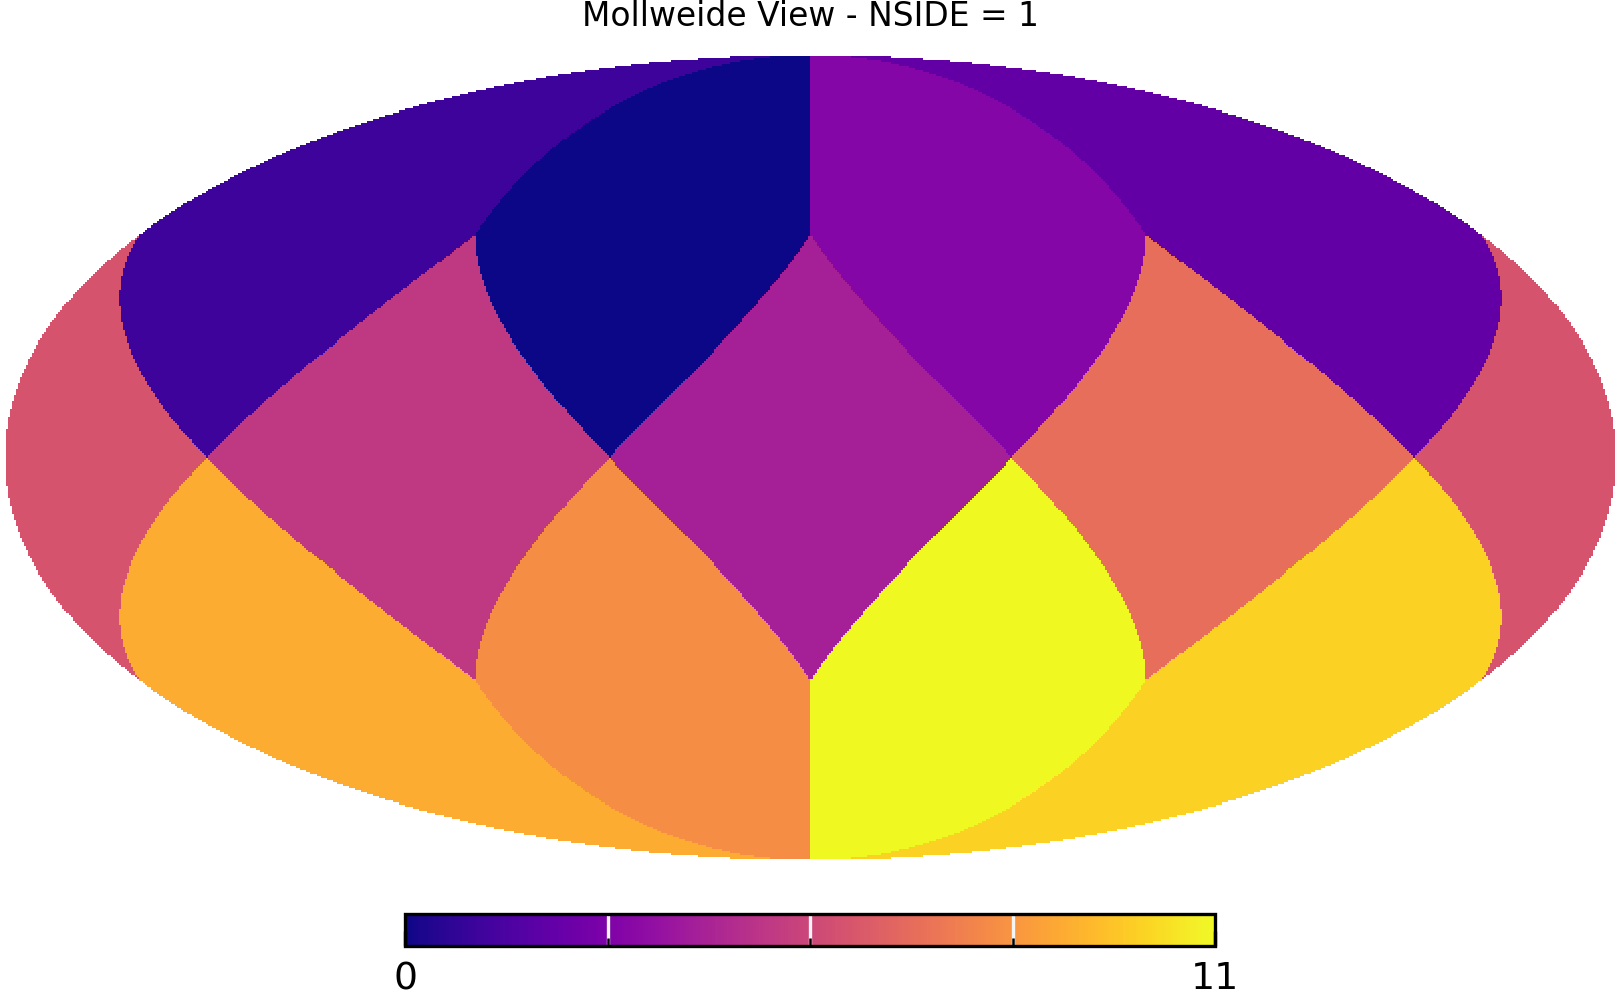

In [30]:
fig, ax = plt.subplots(figsize=set_size(), dpi=300)
ax.axis("off")
hp.mollview(map_arr, cmap="plasma", fig=fig, sub=(1,1,1),
            title="Mollweide View - NSIDE = 1")
plt.savefig("./figures/P21_single.svg")
plt.show()

For NSIDE = $2^0$, notice the colour scheme of the pixels (from dark to light pixels) --> see how the pixels are arranged. Try to figure out which one is the first and which one is the last pixel. For example: zeroth index starts at the north pole left to the meridian.

#### Calculate the $\theta_{pixel}$ for this NSIDE using hp.nside2pixarea (https://healpy.readthedocs.io/en/latest/generated/healpy.pixelfunc.nside2pixarea.html) and the relevant equation provided in the lab manual

In [47]:
# size of each pixel in square radians and square degrees

size_pix_rad = hp.nside2pixarea(1)
display_param("size_pix_rad")
size_pix_deg = hp.nside2pixarea(1, degrees=True)
display_param("size_pix_deg")

size_pix_rad = 1.0471975511965976
size_pix_deg = 3437.746770784939


#### Repeat all the above exercises for NSIDE = $2^1, 2^2, 2^3, 2^{11}$. Visualize the changes at map level and also compute the number of pixels and pixel scale for the different NSIDE

---------------------------------------------
NSIDE = 2
npix_lab_2 = 48
size_pix_rad = 0.2617993877991494
size_pix_deg = 859.4366926962348
---------------------------------------------
NSIDE = 4
npix_lab_4 = 192
size_pix_rad = 0.06544984694978735
size_pix_deg = 214.8591731740587
---------------------------------------------
NSIDE = 8
npix_lab_8 = 768
size_pix_rad = 0.016362461737446838
size_pix_deg = 53.714793293514674
---------------------------------------------
NSIDE = 2048
npix_lab_2048 = 50331648
size_pix_rad = 2.4967135219492856e-07
size_pix_deg = 0.0008196227004015301


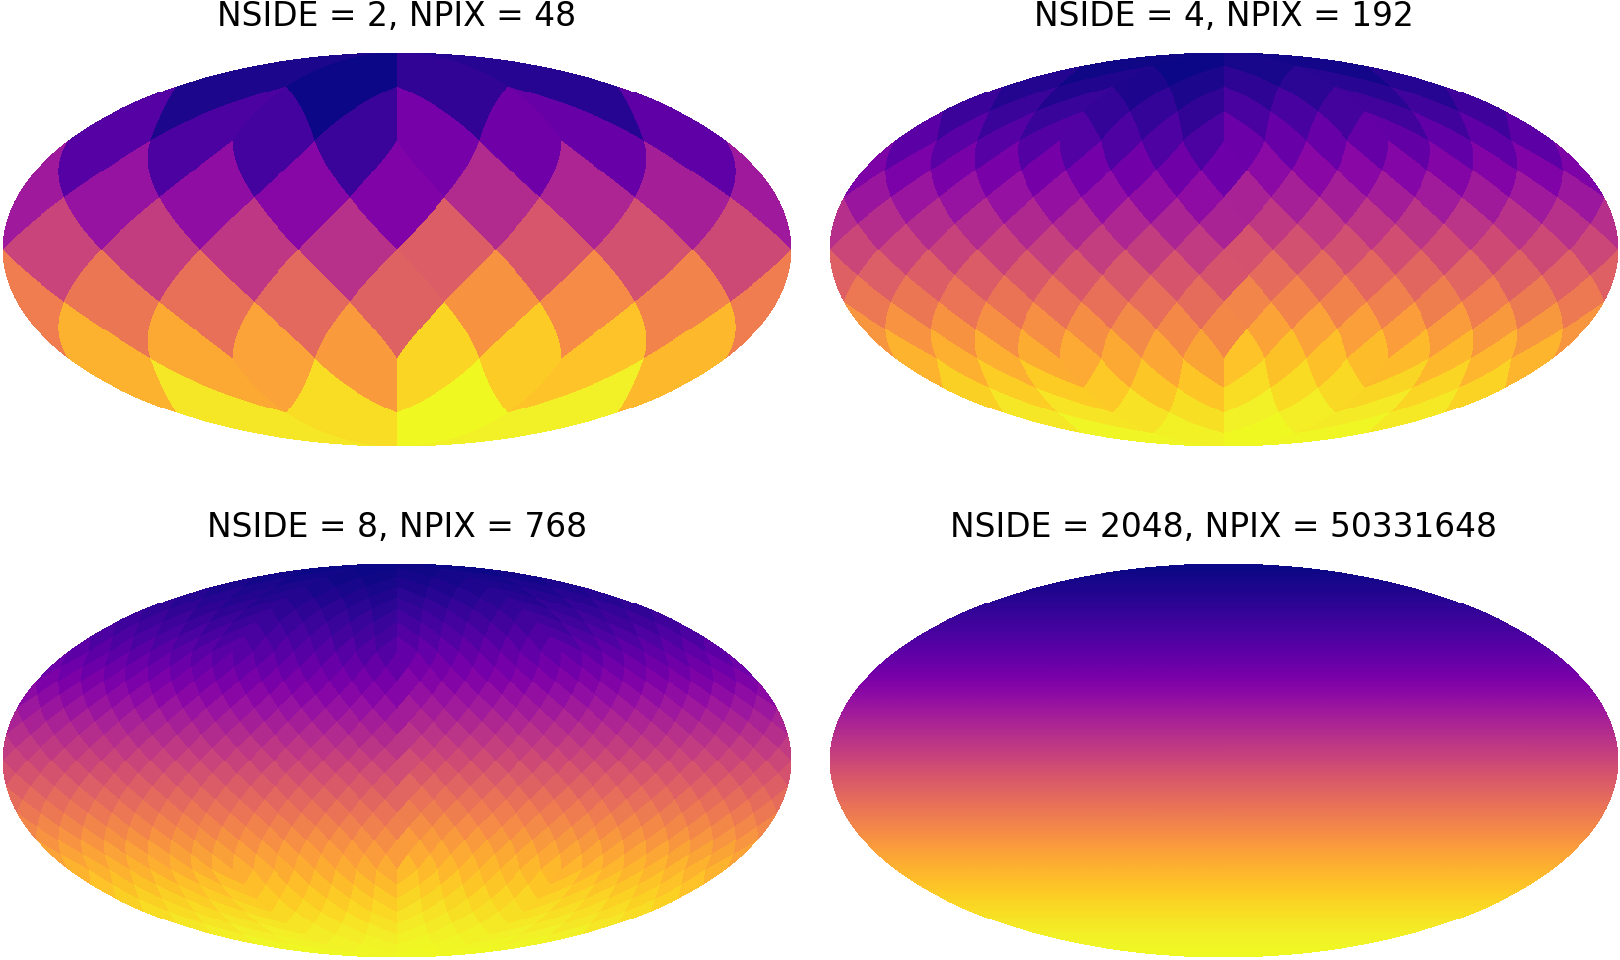

In [46]:
NSIDE_array = [2**1, 2**2, 2**3, 2**11]

def try_nsides(NSIDE, return_map=False, display_values=True):
    
    if display_values:
        print("---------------------------------------------")
        print(f"NSIDE = {NSIDE}")

    # how the lab manual gets npix
    npix = 12 * NSIDE**2
    print(f"npix_lab_{NSIDE} = {npix}")

    # get array
    map_arr = np.arange(npix)

    size_pix_rad = hp.nside2pixarea(NSIDE)
    size_pix_deg = hp.nside2pixarea(NSIDE, degrees=True)
    if display_values:
        print(f"size_pix_rad = {size_pix_rad}")
        print(f"size_pix_deg = {size_pix_deg}")

    # for the next exercise
    if return_map:
        return map_arr, npix
    else:
        return  

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=set_size(),
                        dpi=300)
axs = axs.flat

for i, curr_nside in enumerate(NSIDE_array):
    curr_map, curr_pix = try_nsides(curr_nside, return_map=True)
    # and display the map
    axs[i].axis("off")
    hp.mollview(curr_map,
                title = fr"NSIDE = {curr_nside}, NPIX = {curr_pix}",
                sub=(2, 2, i + 1), fig=fig, cmap="plasma", cbar=False)
    axs[i].title.set_fontsize(8)

plt.savefig("./figures/P21_overview.svg")
plt.show()

**For our lab we will be working with NSIDE = $2^{11}$. This is the same resolution as the weak lensing shear maps we will use from the Takahashi (T17) simulations.**

# P2.2 : Extracting circular patches on the sphere with healpy

In this exercise you will query a circular patch (disc) with a certain radius at a specified position on the NSIDE = $2^{11}$ map that you have created above. In order to do so:

- First specify the center of the patch in angular spherical coordinates and the radius of the patch (use 2.5 degrees as the angular radius of the patch). To achieve this, use the function hp.ang2vec(theta, phi) to get the normalised unit vector of the center of the patch at the angular spherical coordinates theta and phi of the patch center.

In [37]:
full_NSIDE = 2**11
full_map = try_nsides(NSIDE=full_NSIDE, return_map=True)
cen_unit_vec = hp.ang2vec(np.pi/2,0)

npix_lab_2048 = 50331648


- Then query a circular disc of desired radius (in radians) using the function hp.query_disc(NSIDE, vec=vec, radius=np.radians(radius_patch)) . This will return all the pixel indices of the above map which fall within the disc

In [38]:
circ_disc = hp.query_disc(full_NSIDE, vec=cen_unit_vec,
                          radius = np.radians(2.5))

# set all values at pixels (indices of array) [circ_disk] to 1
full_map_w_disk = np.copy(full_map)
full_map_w_disk[circ_disc] = 1

fig, ax = plt.subplots(figsize=set_size())
hp.mollview(full_map_w_disk, fig=fig, sub=(1,1,1))

IndexError: index 24072192 is out of bounds for axis 0 with size 2

- Now assign a value of 1 to all these disc pixels and visualise the corresponding map


- On the map draw 5 separate non-overlapping circular patches (use a loop) and visualize the final map

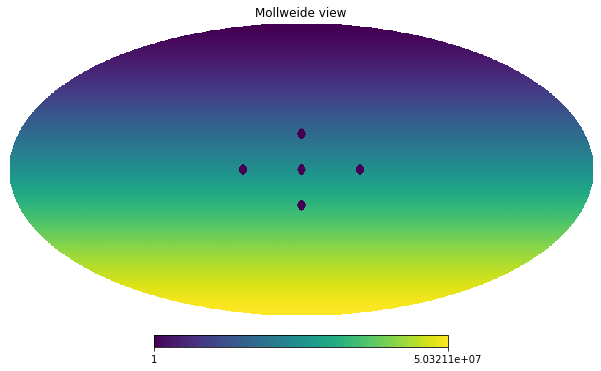

In [10]:
curr_map = np.copy(full_map)

def subtract_circular_patch(curr_map, theta, phi):
    cen_unit_vec = hp.ang2vec(theta, phi)
    curr_circ = hp.query_disc(full_NSIDE, vec=cen_unit_vec,
                              radius = np.radians(2.5))
    curr_map[curr_circ] = 1
    return curr_map

# positions for all circular patches
# should mark a disk at the end
thetas = [np.pi/2, np.pi/2, np.pi/2, np.pi/2-0.1*np.pi, np.pi/2+0.1*np.pi]
phis = [0, 0.2*np.pi, 2*np.pi-0.2*np.pi, 0, 0]

for curr_theta, curr_phi in zip(thetas,phis):
     curr_map = subtract_circular_patch(curr_map=curr_map,
                                        theta = curr_theta,
                                        phi = curr_phi)

hp.mollview(curr_map)

# P2.3: Importing and checking the simulated weak lensing shear maps from Takahashi simulations (T17)

In this exercise you will import the publicly available Takahashi (T17) simulation weak lensing shear ($\gamma_1$ and $\gamma_2$ components) as healpix maps 

For details about the simulation, refer to: http://cosmo.phys.hirosaki-u.ac.jp/takahasi/allsky_raytracing/). For the lab we will be using the shear maps at 2 different source redshifts at $z_{s,1}$ = 0.5739 and $z_{s,2}$ = 1.0334. The maps are already downloaded in the directory you are working in. We will initially start with only the $z_{s,1}$ map

- Load (use hp.read_map) both the $\gamma_1$ and $\gamma_2$ components of the shear map at source redshift $z_{s,1}$ and visualize them. Check how many pixels are there in each shear map and verify that it corresponds to NSIDE = $2^{11}$.

True


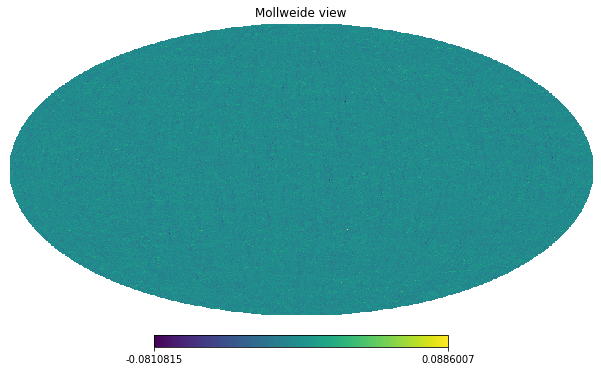

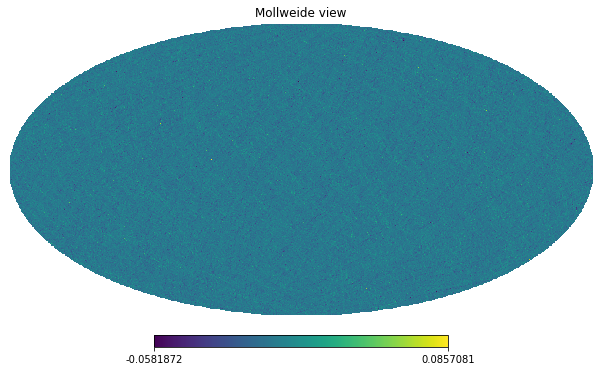

In [19]:
path = "./T17_simulation_WL_shear_data/allskymap_NSIDE2048_r000_zsource_0.5739"
gamma1_z1 = hp.read_map(f"{path}_gamma1.fits")
gamma2_z1 = hp.read_map(f"{path}_gamma2.fits")

path = "./T17_simulation_WL_shear_data/allskymap_NSIDE2048_r000_zsource_1.0334"
gamma1_z2 = hp.read_map(f"{path}_gamma1.fits")
gamma2_z2 = hp.read_map(f"{path}_gamma2.fits")

# are they all the same size?
print((len(gamma1_z1) == len(gamma2_z1) == 12*(2**11)**2))

hp.mollview(gamma1_z1)
hp.mollview(gamma2_z1)

# P2.4: Working with *treecorr*: package to compute shear two-point correlation functions (2PCFs)

In order to measure the shear 2PCFs $\xi_{\pm}$ from the $\gamma_1$ and $\gamma_2$ maps at source redshift $z_{s,1}$ you have visualized above you will use the publicly available code package treecorr (https://rmjarvis.github.io/TreeCorr/_build/html/index.html). 

Treecorr has many functionalities (computing different kinds of 2-point correlations and also 3-point correlations). As we are interested in computing specifically the shear-shear 2PCF we will use the GGCorrelation module. Read  up about it in https://rmjarvis.github.io/TreeCorr/_build/html/gg.html

- Firstly, treecorr needs access to the shear $\gamma_1$ and $\gamma_2$ data in the form of the  values and the associated ra and dec of the shear pixels. Use the pixel indices of one of the circular discs you had extracted in P2.2, compute the ra and dec of those pixels using the function provided below
- Print out the gamma1 and gamma2 values of these extracted pixels

In [20]:
def pixel2RaDec(pixel_indices, NSIDE):
    theta, phi = hp.pixelfunc.pix2ang(NSIDE, pixel_indices, nest=False)
    ra = phi
    dec = np.pi/2.0-theta
    return ra, dec

# defining the disk again
cen_unit_vec = hp.ang2vec(np.pi/2, 0)
new_circ = hp.query_disc(2**11, vec=cen_unit_vec,
                          radius = np.radians(2.5))

# getting ra and dec of the disc pixels
ra_dec_array = [pixel2RaDec(i, full_NSIDE) for i in new_circ]
ra_array = [value[0] for value in ra_dec_array]
dec_array = [value[1] for value in ra_dec_array]

# gamma values only for the disc
gamma1_z1_circ = gamma1_z1[new_circ]
gamma2_z1_circ = gamma2_z1[new_circ]

gamma1_z1_circ, len(gamma1_z1_circ), gamma2_z1_circ, len(gamma2_z1_circ),

(array([ 0.0015626 ,  0.00087705,  0.0007107 , ..., -0.00353642,
         0.00309938,  0.00241085], dtype=float32),
 23948,
 array([0.00466651, 0.00147077, 0.00316822, ..., 0.0007352 , 0.00786598,
        0.0021285 ], dtype=float32),
 23948)

- Create a treecorr catalog (use https://rmjarvis.github.io/TreeCorr/_build/html/catalog.html) which contains the ra, dec, gamma1, gamma2, ra_units and dec_units of those extracted pixels. IMPORTANT: You will also need to set the flip_g1=True in the catalog (due to the convention adopted in the Takhashi simulation) 

In [21]:
cata = treecorr.Catalog(ra=ra_array, dec=dec_array, g1=gamma1_z1_circ,
                        g2=gamma2_z1_circ, flip_g1=True, ra_units="rad",
                        dec_units="rad")

In [22]:
# scaling the values to arcminutes to have right units
minimum = 5 * (np.pi / 180 / 60)
maximum = 140 * (np.pi / 180 / 60)

ggcorr = treecorr.GGCorrelation(nbins=20, min_sep=minimum, 
                                max_sep=maximum)
ggcorr.process(cata)

- Finally, in order to compute the $\xi_{\pm}$ shear 2PCFs, insert the catalog you have created above into the GG instance using the function process().

- Call the methods xip and xim of the treecorr GG instance to get the output of the correlation values. Plot them against the angular bins (which you can get from the nominal bin centres, rnom).

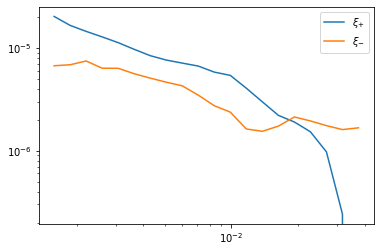

In [23]:
fig, ax = plt.subplots()
ax.plot(ggcorr.rnom, ggcorr.xip, label=r"$\xi_{+}$")
ax.plot(ggcorr.rnom, ggcorr.xim, label=r"$\xi_{-}$")
ax.set_xscale("log")
ax.set_yscale("log")
plt.legend()
plt.show()

# P2.5: Computing the average shear 2PCFs in several patches in the $z_{s,1}$ map

In this exercise you will compute the shear 2PCFs within multiple patches in the $z_{s,1}$ map

- Repeat P2.4 for 100 randomly located (preferably non-overlapping) patches on the $z_{s,1}$ map; store the xip and xim computed in 15 bins using treecorr for these 100 patches in a 100x20 array (make separate arrays for xip and xim).

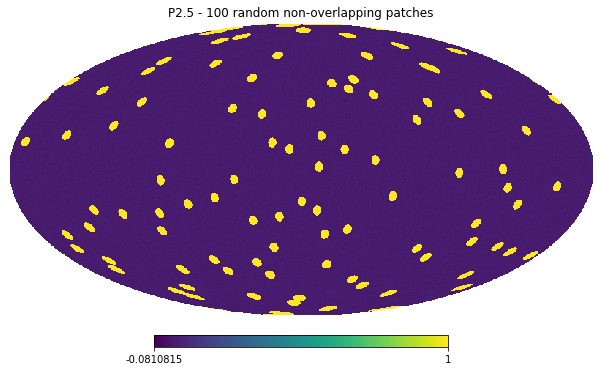

In [24]:
P25_map = np.copy(gamma1_z1)

# slightly changed because we need the curr_circ as_well
def subtract_circular_patch(curr_map, theta, phi, return_circ=True):
    cen_unit_vec = hp.ang2vec(theta, phi)
    curr_circ = hp.query_disc(2**11, vec=cen_unit_vec,
                              radius = np.radians(2.5))
    curr_map[curr_circ] = 1
    if return_circ:
        return curr_map, curr_circ
    return curr_map

def pixel2RaDec(pixel_indices, NSIDE):
    theta, phi = hp.pixelfunc.pix2ang(NSIDE, pixel_indices, nest=False)
    ra = phi
    dec = np.pi/2.0-theta
    return ra, dec

n_patches = 0
picked_phis, picked_thetas, xim_array, xip_array = [], [], [], []
circ_indices = np.array([])
theta_cond, phi_cond = True, True

# we need 100 patches in total
while n_patches < 100:
    
    # random values we try out
    theta_try = np.random.uniform(0, np.pi)
    phi_try = np.random.uniform(0, 2*np.pi)

    # do these values overlap with already picked ones?
    phi_cond = all(
        not (i[0] <= phi_try <= i[1]) for i in picked_phis
    )
    theta_cond = all(
        not (i[0] <= theta_try <= i[1]) for i in picked_thetas
    )

    # if not, then add them to the map and n_patches += 1
    if theta_cond or phi_cond:
        # update the lists of used values
        picked_thetas.append((theta_try - np.radians(2.5),
                              theta_try + np.radians(2.5)))
        picked_phis.append((phi_try - np.radians(2.5),
                           phi_try + np.radians(2.5)))
        # update the map and get the current indices
        P25_map, curr_circ = subtract_circular_patch(curr_map=P25_map,
                                                     theta=theta_try,
                                                     phi=phi_try,
                                                     return_circ=True)
        # add the current ra and dec to the array        
        curr_ra_dec = [pixel2RaDec(i, 2**11) for i in curr_circ]
        ra_array = [value[0] for value in curr_ra_dec]
        dec_array = [value[1] for value in curr_ra_dec]
        # gamma values only for the selected patches
        curr_gamma1_z1 = gamma1_z1[curr_circ]
        curr_gamma2_z1 = gamma2_z1[curr_circ]
        # make cata!
        cata = treecorr.Catalog(
            ra=ra_array, dec=dec_array, g1=curr_gamma1_z1,
            g2=curr_gamma2_z1, flip_g1=True, ra_units="rad",
            dec_units="rad")
        # process!
        # scaling the values to arcminutes to have right units
        minimum = 5 * (np.pi / 180 / 60)
        maximum = 140 * (np.pi / 180 / 60)

        ggcorr = treecorr.GGCorrelation(nbins=20, min_sep=minimum, 
                                        max_sep=maximum)
        ggcorr.process(cata)
        xip_array.append(ggcorr.xip)
        xim_array.append(ggcorr.xim)
        # update the number of patches
        n_patches += 1
    else:
        continue

bins = ggcorr.rnom
hp.mollview(P25_map, title="P2.5 - 100 random non-overlapping patches")

- Compute the mean and standard deviation of the correlations over all these 100 patches. Use np.mean and np.std.

In [25]:
xim_means, xip_means, xim_stds, xip_stds = [], [], [], []

for i in range(0,20):
    curr_xims = [j[i] for j in xim_array]
    curr_xips = [j[i] for j in xip_array]
    xim_means.append(np.mean(curr_xims))
    xip_means.append(np.mean(curr_xips))
    xim_stds.append(np.std(curr_xims))
    xip_stds.append(np.std(curr_xips))

- Plot the individual 100 2PCFs in grey and their mean in red with the standard deviation as the error bars. Use plt.errorbar()

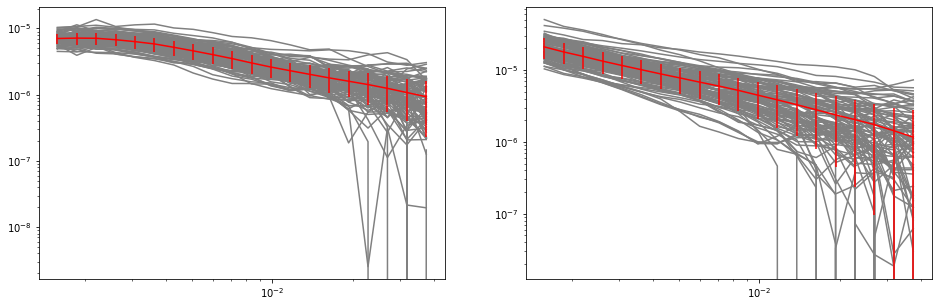

In [26]:
fig, axs = plt.subplots(ncols=2, figsize=(16,5))

for xip, xim in zip(xip_array, xim_array):
    axs[0].loglog(bins, xim, color="grey", zorder=0-1)
    axs[1].loglog(bins, xip, color="grey", zorder=0.1)

axs[0].errorbar(x=bins, y=xim_means, yerr=xim_stds, color="red")
axs[1].errorbar(x=bins, y=xip_means, yerr=xip_stds, color="red")

plt.show()

# P2.6: Computing the average shear 2PCFs in several patches in the $z_{s,2}$ map

In this exercise you will compute the shear 2PCFs within multiple patches in the $z_{s,2}$ map

- Repeat P2.5 for the $z_{s,2}$ map

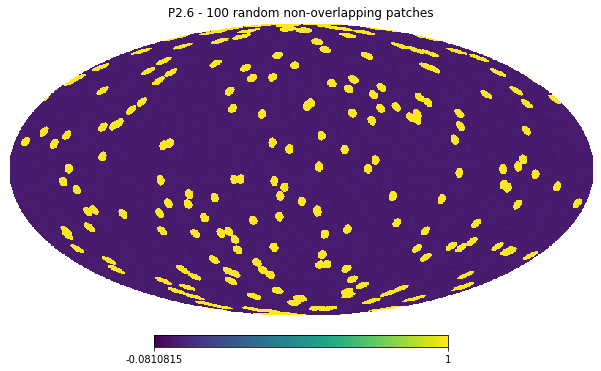

In [27]:
P26_map = np.copy(gamma1_z1)

# slightly changed because we need the curr_circ as_well
def subtract_circular_patch(curr_map, theta, phi, return_circ=True):
    cen_unit_vec = hp.ang2vec(theta, phi)
    curr_circ = hp.query_disc(2**11, vec=cen_unit_vec,
                              radius = np.radians(2.5))
    curr_map[curr_circ] = 1
    if return_circ:
        return curr_map, curr_circ
    return curr_map

def pixel2RaDec(pixel_indices, NSIDE):
    theta, phi = hp.pixelfunc.pix2ang(NSIDE, pixel_indices, nest=False)
    ra = phi
    dec = np.pi/2.0-theta
    return ra, dec

n_patches = 0
picked_phis, picked_thetas, xim_array, xip_array = [], [], [], []
circ_indices = np.array([])
theta_cond, phi_cond = True, True

# we need 100 patches in total
while n_patches < 100:
    
    # random values we try out
    theta_try = np.random.uniform(0, np.pi)
    phi_try = np.random.uniform(0, 2*np.pi)

    # do these values overlap with already picked ones?
    phi_cond = all(
        not (i[0] <= phi_try <= i[1]) for i in picked_phis
    )
    theta_cond = all(
        not (i[0] <= theta_try <= i[1]) for i in picked_thetas
    )

    # if not, then add them to the map and n_patches += 1
    if theta_cond or phi_cond:
        # update the lists of used values
        picked_thetas.append((theta_try - np.radians(2.5),
                              theta_try + np.radians(2.5)))
        picked_phis.append((phi_try - np.radians(2.5),
                           phi_try + np.radians(2.5)))
        # update the map and get the current indices
        P25_map, curr_circ = subtract_circular_patch(curr_map=P25_map,
                                                     theta=theta_try,
                                                     phi=phi_try,
                                                     return_circ=True)
        # add the current ra and dec to the array        
        curr_ra_dec = [pixel2RaDec(i, 2**11) for i in curr_circ]
        ra_array = [value[0] for value in curr_ra_dec]
        dec_array = [value[1] for value in curr_ra_dec]
        # gamma values only for the selected patches
        curr_gamma1_z2 = gamma1_z2[curr_circ]
        curr_gamma2_z2 = gamma2_z2[curr_circ]
        # make cata!
        cata = treecorr.Catalog(
            ra=ra_array, dec=dec_array, g1=curr_gamma1_z2,
            g2=curr_gamma2_z2, flip_g1=True, ra_units="rad",
            dec_units="rad")
        # process!
        # scaling the values to arcminutes to have right units
        minimum = 5 * (np.pi / 180 / 60)
        maximum = 140 * (np.pi / 180 / 60)

        ggcorr = treecorr.GGCorrelation(nbins=20, min_sep=minimum, 
                                        max_sep=maximum)
        ggcorr.process(cata)
        xip_array.append(ggcorr.xip)
        xim_array.append(ggcorr.xim)
        # update the number of patches
        n_patches += 1
    else:
        continue

bins = ggcorr.rnom
hp.mollview(P25_map, title="P2.6 - 100 random non-overlapping patches")

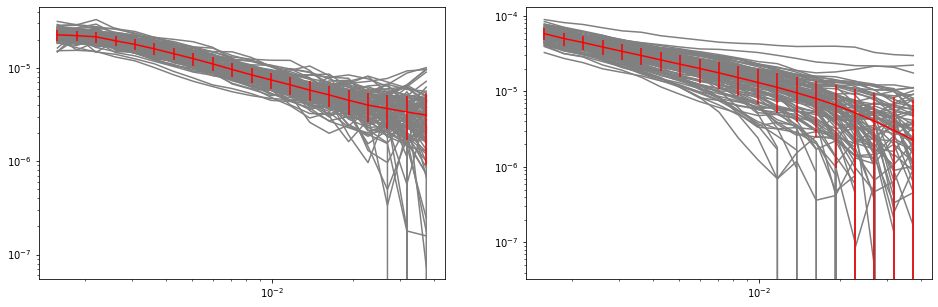

In [28]:
xim_means, xip_means, xim_stds, xip_stds = [], [], [], []

for i in range(0,20):
    curr_xims = [j[i] for j in xim_array]
    curr_xips = [j[i] for j in xip_array]
    xim_means.append(np.mean(curr_xims))
    xip_means.append(np.mean(curr_xips))
    xim_stds.append(np.std(curr_xims))
    xip_stds.append(np.std(curr_xips))

fig, axs = plt.subplots(ncols=2, figsize=(16,5))

for xip, xim in zip(xip_array, xim_array):
    axs[0].loglog(bins, xim, color="grey", zorder=0-1)
    axs[1].loglog(bins, xip, color="grey", zorder=0.1)

axs[0].errorbar(x=bins, y=xim_means, yerr=xim_stds, color="red")
axs[1].errorbar(x=bins, y=xip_means, yerr=xip_stds, color="red")

plt.show()

# P2.7: Comparing theory calculations of the shear 2PCFs against the measurements from the simulation

Load and plot the theoretical curves for $z_{s,1}$ and $z_{s,2}$ (that you computed on the first day in P1.7) together with the average of the measurements from the Takahashi simulations (that you computed in P2.5 and P2.6). Compare the theoretical curves to your measurements and see whether they agree or not.

In [ ]:
# Write your code here. Add more coding cells as needed.